# Where does it pay to go to college?
Joanne Lin

### Abstract:
The student loan debt landscape is pretty grim.  In the US, Americans owe 1.45 trillion dollars in student loans, spread over 44.2 million borrowers ([source](https://blogs.wsj.com/economics/2016/05/02/student-debt-is-about-to-set-another-record-but-the-picture-isnt-all-bad/)).  The average graduate in 2016 has over $37,000 in loans to pay off ([source](https://blogs.wsj.com/economics/2016/05/02/student-debt-is-about-to-set-another-record-but-the-picture-isnt-all-bad/)). More than ever, students and their families must consider earning potential post-graduation when deciding where to attend college.  

The following project examines the starting and mid-career salaries of 5 different school types:  Engineering, Ivy League, Liberal Arts, Party Schools and State schools.  I will determine what kind of salary graduates of each school type can reasonably expect right out of school and during their mid-careers.  I will also be running significance tests to compare salaries between schools.    

## Setting up the data frames

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#### Data Source

I downloaded this dataset frm kaggle.com ([source](https://www.kaggle.com/wsj/college-salaries)).  It was originally aggregated by the Wall Street Journal from Payscale, Inc.   "Mid-Career" is defined as 10 years post-commencement. 

In [2]:
# Loading files
college = pd.read_csv('capstone-data/salaries-by-college-type.csv')

college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [3]:
# Renaming columns
college.columns = ['name', 'type','start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']
college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [4]:
#Changing strings to ints for analysis

dollar_cols = ['start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for x in dollar_cols:
    college[x] = college[x].str.replace("$","")
    college[x] = college[x].str.replace(",","")
    college[x] = pd.to_numeric(college[x])

college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


## Describing the dataset

In [5]:
# Summary statistics of college dataset
college.describe().round(0)

,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
count,269.0,269.0,231.0,269.0,269.0,231.0
mean,46068.0,83932.0,44251.0,60373.0,116275.0,157706.0
std,6413.0,14336.0,8720.0,11381.0,22952.0,34823.0
min,34800.0,43900.0,22600.0,31800.0,60900.0,87600.0
25%,42000.0,74000.0,39000.0,53200.0,100000.0,136000.0
50%,44700.0,81600.0,43100.0,58400.0,113000.0,153000.0
75%,48300.0,92200.0,47400.0,65100.0,126000.0,170500.0
max,75500.0,134000.0,80000.0,104000.0,234000.0,326000.0


In [6]:
# Summary statistics by type of school
college.groupby('type').describe().round(2)

mid_med                                                     \
               count       mean       std       min       25%       50%   
type                                                                      
Engineering     19.0  103842.11  13840.73   80000.0   94400.0  106000.0   
Ivy League       8.0  120125.00  10412.05  107000.0  109750.0  122000.0   
Liberal Arts    47.0   89378.72  12318.17   63900.0   80850.0   85800.0   
Party           20.0   84685.00   7237.57   73000.0   79350.0   84050.0   
State          175.0   78567.43  10296.07   43900.0   71800.0   78500.0   

                                 mid_p10             ...      mid_p90  \
                   75%       max   count      mean   ...          75%   
type                                                 ...                
Engineering   114000.0  126000.0    15.0  61793.33   ...     187500.0   
Ivy League    127250.0  134000.0     8.0  57900.00   ...     296250.0   
Liberal Arts  101500.0  110000.0    14.0  47478.57   ...     214000.0   
Party          88975.0   96100.0    19.0  44052.63   ...     175000.0   
State          84450.0  112000.0   175.0  41886.29   ...     161500.0   

                       start_med                                       \
                   max     count      mean      std      min      25%   
type                                                                    
Engineering   220000.0      19.0  59057.89  7842.92  46200.0  53250.0   
Ivy League    326000.0       8.0  60475.00  3218.58  56200.0  58825.0   
Liberal Arts  265000.0      47.0  45746.81  4368.85  38500.0  42250.0   
Party         209000.0      20.0  45715.00  3685.72  41300.0  42500.0   
State         215000.0     175.0  44126.29  4269.07  34800.0  41400.0   

                                         
                  50%      75%      max  
type                                     
Engineering   58300.0  62000.0  75500.0  
Ivy League    59850.0  61525.0  66500.0  
Liberal Arts  45500.0  48600.0  54500.0  
Party         44600.0  47975.0  52900.0  
State         43600.0  46300.0  59900.0  

[5 rows x 48 columns]

This dataset contains 269 schools grouped into 5 different categories: Engineering, Ivy League, Liberal Arts, Party and State.  For each school, we have the starting and mid-career median salaries of their graduates.  The dataset also includes information on the schools' mid-career salaries for the 10th, 25th, 75th and 90th percentiles. Because the percentile information is incomplete, I will not be using this data for analysis.

The summary statistics above show that we have data on a lot more state schools (175) compared to the other types of schools.  We also see that Ivy League and Engineering schools have higher mean starting and mid-career salaries compared to the other types.  We would need to run statistical tests to determine if these differences are significant.

In [7]:
# What are the top 10 state schools in terms of starting and mid-career salaries?

college[college['type'] == 'State'].sort_values(['start_med','mid_med'], ascending=False).head(10)

# Go Bears. ʕ•ᴥ•ʔ 

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
94,"University of California, Berkeley",State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
96,Cal Poly San Luis Obispo,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0
105,University of Missouri - Rolla (UMR),State,57100.0,95800.0,67600.0,80400.0,122000.0,166000.0
104,Binghamton University,State,53600.0,95900.0,50900.0,71200.0,146000.0,201000.0
106,San Jose State University (SJSU),State,53500.0,95600.0,50700.0,70500.0,122000.0,156000.0
102,University of Illinois at Urbana-Champaign (UIUC),State,52900.0,96100.0,48200.0,68900.0,132000.0,177000.0
95,University of Virginia (UVA),State,52700.0,103000.0,52200.0,71800.0,146000.0,215000.0
110,University of Michigan,State,52700.0,93000.0,50900.0,69400.0,128000.0,182000.0
97,University of California at Los Angeles (UCLA),State,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0
99,"University of California, Davis",State,52300.0,99600.0,52000.0,71600.0,135000.0,202000.0


## Analysis

### Visualizations
#### What can graduates of each school type reasonably expect in terms of starting and mid-career salaries?

In this section, I will be utilizing histograms and boxplots to visualize the distribution of salaries of each school type.  These visualizations will help us compare the starting and mid-career median salaries between school types.  

In [8]:
# Creating variables for relevant data arrays
Eng = college[college['type'] == "Engineering"]['start_med']
Ivy = college[college['type'] == "Ivy League"]['start_med']
LibArts = college[college['type'] == "Liberal Arts"]['start_med']
Party = college[college['type'] == "Party"]['start_med']
State = college[college['type'] == "State"]['start_med']
start_med = [Eng, Ivy, LibArts, Party, State]

Eng2 = college[college['type'] == "Engineering"]['mid_med']
Ivy2 = college[college['type'] == "Ivy League"]['mid_med']
LibArts2 = college[college['type'] == "Liberal Arts"]['mid_med']
Party2 = college[college['type'] == "Party"]['mid_med']
State2 = college[college['type'] == "State"]['mid_med']
mid_career = [Eng2, Ivy2, LibArts2, Party2, State2]

#Sammmeee?
#grps = ['Engineering','Ivy League','Liberal Arts', 'Party', 'State']
#sm_data = {grp:college['start_med'][college.type == grp] for grp in grps}
#mc_data = {grp:college['mid_med'][college.type == grp] for grp in grps}

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


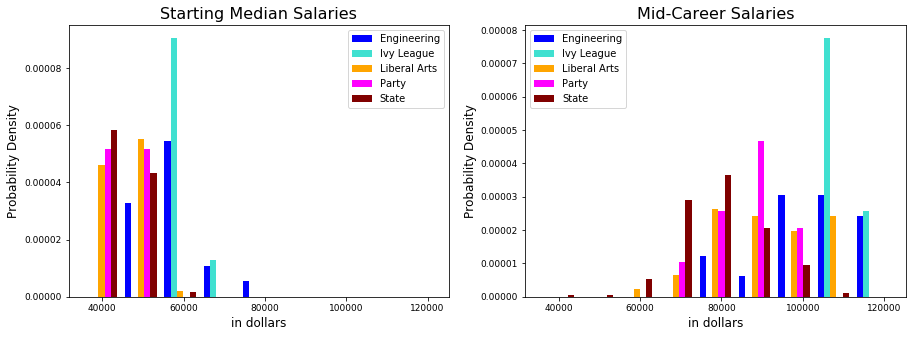

In [9]:
# Generating histograms for starting and mid-career salaries by type of school
n_bins = 9
colors = ['blue','turquoise', 'orange', 'magenta','maroon']
labels = ['Engineering','Ivy League','Liberal Arts','Party','State']
xrange = (35000, 122000) 

s = [start_med,mid_career]
t = ['Starting Median Salaries', 'Mid-Career Salaries']

plt.figure(figsize=(15,5))

for i in range(0,len(s)):
    plt.subplot(1, 2, i+1)
    
    plt.hist(s[i], n_bins, xrange, histtype='bar', normed=True, color = colors, label=labels)
    plt.title(t[i], fontsize=16)
    plt.xlabel("in dollars", fontsize=12)  
    plt.ylabel("Probability Density", fontsize=12)
    plt.xticks(fontsize=9)  
    plt.yticks(fontsize=9)
    plt.legend(prop={'size':10})

    i += 1

The historgrams of the starting median salaries for each schhol type are pretty clustered, with the exception of Engineering schools.  Liberal Arts, Party and State schools have starting median salaries that cluster between \$35,000 and \$55,000. Ivy league schools have notably higher starting median salaries than most other types of schools, clustering between \$58,000 and \$70,000.  Engineering schools have the most variation, indicating that which engineering school attended matters when looking at starting median salaries.  

Considering mid-career salaries, all school types have a wider range of salaries with the exception of Ivy Leagues.  Liberal Arts, Party and State schhols have salaries that cluster between \$70,000 and \$105,000. This suggests that graduates from these three types of school have similar earning potential by mid career.  Engineering schools also have a broader range compared to its starting median salary, from \$75,000 to \$110,000.  Interestingly, the distribution of Ivy League mid-career salaries remains small, ranging from about \$110,000 to \$118,000. This indicates that graduates of the Ivy League system can reasonably expect a higher starting and mid-career salary, regardless of which school within the Ivy League system they attend.  

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


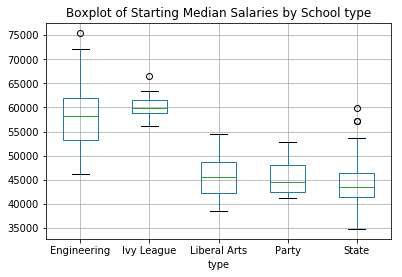

In [10]:
# Boxplots of starting median salaries by type of college.

college.boxplot('start_med',by='type')
plt.title("Boxplot of Starting Median Salaries by School type")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


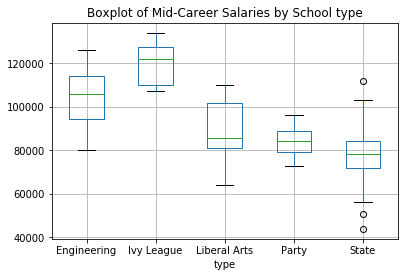

In [11]:
#Boxplots of mid-career salaries by type of college

college.boxplot('mid_med',by='type')
plt.title("Boxplot of Mid-Career Salaries by School type")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


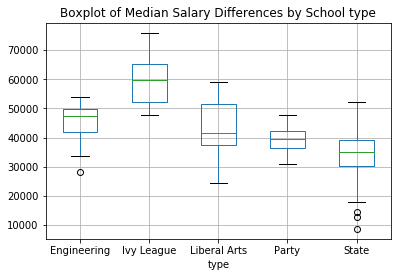

In [12]:
#Boxplot of the difference between starting median salaries and mid-career salaries for each college type

college['salary_diff'] = college['mid_med'] - college['start_med']

college.boxplot('salary_diff', by='type')
plt.title("Boxplot of Median Salary Differences by School type")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

The boxplots show definitively that Engineering schools have the most range with starting median salaries, implying that where an engineering student goes to school matters more than the other types of colleges when looking at earning potential right after graduation.  Ivy leagues have less variation in terms of starting salaries and the highest mean starting median salary. Where a student goes within the Ivy League system matters less when looking at starting median salaries, and graduates can reasonably expect to make more than graduates from other schhol types. Liberal Arts, Party and State schools have similar mean median starting salaries, with more variation in state schools.  State schools have a larger dataset compared to the other schools, as seen in the histogram. This may account for the variation.

The mid-career boxplots show that, similar to the starting median salaries, Liberal Arts, State and Party schools have similar mean median salaries.  It is interesting to note that Ivy League mid-career salaries has pulled ahead of Engineering mid-career salaries, such that all 8 mid-career salaries from Ivy League schools are higher than 50% of Engineering mid-career salaries.  

The last boxpot examines the difference between mid-career salaries and starting salaries for each school type.  Not surprisingly, Ivy Leagues come on top again, with the highest mean difference in salaries.  This means that not only do Ivy League graduates have higher salaries to start with, they also experience higher increases in their salaries by mid-career.  Party schools have the second lowest mean and the least variation, suggesting that graduates from party schools experience limited growth in salaries.  State school, again, have the most variation.  



### Significance testing

#### Are the data for each school type normal?
To run the ANOVA tests, we first need to check for normality in the data.  We do this by generating QQ plots.

In [13]:
def qqplot(column):
    
    plt.figure(figsize=(20,5))
    types = ['Engineering','Ivy League','Liberal Arts','Party','State']

    for i in range(0,len(types)):  
        plt.subplot(1, len(types), i+1)

        t = types[i]

        x = college[college['type'] == t][column].sort_values()
        
        np.random.seed(2119)
        norm = np.random.normal(0,1,len(x))
        norm.sort()

        plt.plot(norm, x, "o", c=np.random.rand(3))
        plt.title(t)

        #generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
        z = np.polyfit(norm,x, 1)
        p = np.poly1d(z)
        plt.plot(norm,p(norm),"k--", linewidth=1)
        plt.xlabel("Theoretical quantiles")
        plt.ylabel("Expreimental quantiles")
        plt.tick_params()

        i = i + 1 

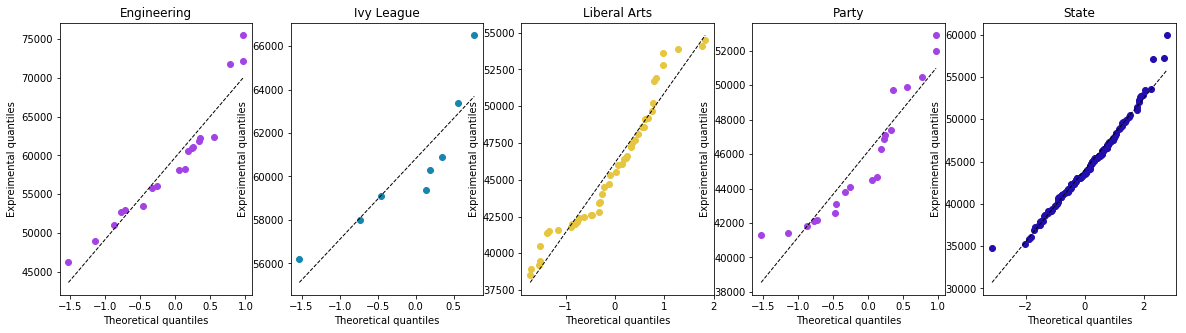

In [14]:
qqplot('start_med')

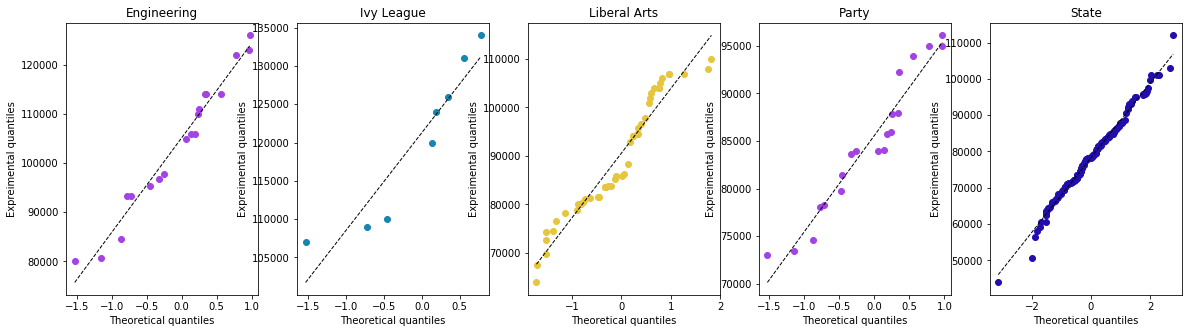

In [15]:
qqplot('mid_med')

The QQ Plots show a left skew for Liberal Arts and Party schools.  While ANOVA requires variables to be normally distributed, it is robust to modest violations of normality.  So for the purposes of this analysis, I will move forward with the ANOVA tests.

In [16]:
# Setting up for running ANOVA tests

grps = ['Engineering','Ivy League','Liberal Arts', 'Party', 'State']
sm_data = {grp:college['start_med'][college.type == grp] for grp in grps}
mc_data = {grp:college['mid_med'][college.type == grp] for grp in grps}
k = len(pd.unique(college.type))
N = len(college.values)
n = college.groupby('type').size()[0]

#### Is the mean median starting and mid-career salaries significantly different between Liberal Arts, Party and State schools?

In [17]:
# First we should remove the outliers for the State Schools, as outliers could skew the mean calculations.

state = college[college['type'] == 'State']
state_sm = state[np.abs(state.start_med-state.start_med.mean()) <= (2*state.start_med.std())]
state_mc = state[np.abs(state.mid_med-state.mid_med.mean()) <= (2*state.mid_med.std())]

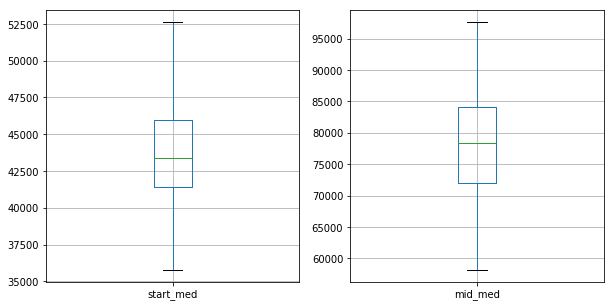

In [18]:
# Check boxplots that outliers have been removed

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
state_sm.boxplot('start_med')

plt.subplot(1,2,2)
state_mc.boxplot('mid_med')

plt.show()

In [19]:
# Let's start by comparing the starting median salaries of Liberal Arts, Party, and State schools.
f, p = stats.f_oneway(sm_data['Liberal Arts'], sm_data['Party'], state_sm['start_med'])

print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

F-Statistic is  7.17
p-value is  0.001


The F-Statistic of 7.17 and a p-value of 0.001 indicates that, if the the starting median salaries of these three schools are the same, we would expect to obtain the observed difference or more in 0.1% of the studies due to sampling error.  This suggests we can reject the null hypothesis and assume that these three types of schools have significantly different starting median salaries.  This is in contrast to the observations made when eyeballing at the histograms and boxplots, in which the starting median salaries look similar across these three groups.  

In [20]:
# Looking at mid-career salaries between Liberal Arts, Party and State
f, p = stats.f_oneway(mc_data['Liberal Arts'], mc_data['Party'], state_mc['mid_med'])

print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

F-Statistic is  27.67
p-value is  0.0


The F-Statistic of 20.8 and a p-value of 0 indicates we can reject the null hypothesis and assume that these three types of schools have significantly different mid-career median salaries.

#### Is the mean median starting and mid-career salaries significantly different between Liberal Arts and Party?

State school have a lot of variation, which may affect the mean.  What if we just compare Party and Liberal Arts schools?

In [21]:
f, p = stats.f_oneway(sm_data['Liberal Arts'], sm_data['Party'])

print('Starting Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))
print('\n')

f, p = stats.f_oneway(mc_data['Liberal Arts'], mc_data['Party'])

print('Mid-Career Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

Starting Median Salary:
F-Statistic is  0.0
p-value is  0.9774


Mid-Career Median Salary:
F-Statistic is  2.52
p-value is  0.1173


When comparing the means median salaries of Liberal Arts and Party schools, there is not enough evidence to show a statistically significant difference in mean median salaries.  

#### Is the mean median starting and mid-career salaries significantly different between Engineering and Ivy League schools?

In [24]:
# Now let's compare the starting median salaries and mid-career salaries for engineering and Ivy League schools.
f, p = stats.f_oneway(sm_data['Engineering'], sm_data['Ivy League'])

print('Starting Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))
print('\n')

f, p = stats.f_oneway(mc_data['Engineering'], mc_data['Ivy League'])
print('Mid-Career Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

Starting Median Salary:
F-Statistic is  0.24
p-value is  0.6288


Mid-Career Median Salary:
F-Statistic is  8.87
p-value is  0.0064


Interestingly, the difference in salaries of Engineering and Ivy League schools start off as not significantly different (p-value = 0.63), but become significant when we look at mid-career salaries (p-value = 0.006).  This suggests that, in the long run, it still pays to go to an Ivy League school.  

## Conclusion

So where does it pay to go to college?  According to this dataset, Ivy league graduates generally made money money right out of college and 10 years after graduation compared to graduates from other school types.  Plus, there is less variation within the Ivy League system in terms of median salaries, so where a student goes within the Ivy League system does not seem to matter.  This is in contrast to Engineering schools, where the school matters in terms of starting and mid-career median salaries.  Looking at the distribution of median salaries, students from a "good" engineering school can make as much mid-career as an Ivy League student. Students from a "bad" engineering school may do just as well as a student from a Party, Liberal Arts, or State school.

There is more variation in median salaries for state schools, including more outliers.  This indicates that the state school attended by the student matters when looking at starting and mid-career salaries.  When comparing mean median salaries for state, liberal arts and party schools, the difference is statistically significant.  Mean median salaries of liberal arts and party schools, on the other hand, are not statistically significant.  This suggests that students from party schools have similar salaries to students in liberal arts schools.

If we compare Engineering and Ivy League schools, the difference in mean median salaries start out as insignificant, but becomes significant 10 years post graduation with Ivy League salaries pulling ahead.  

There are limitations to this dataset.  For one, the dataset only includes the median salaries of each school's graduates.  We do not have information on the salary distribution within the school.   We are also not considering other factors that may impact salary, such as the student's major or whether the student went to grad school before hitting mid-career.  

## Further Research

The current analysis does not consider the cost of tuition and student loans.  Ivy leagues, for example, have higher sticker prices than a state school might.  How long does it take a student of each type school to earn back the cost of tuition?  If we consider the median student loan amounts, how would the conclusions change?  Analysis into tuition and student loans would require gathering more data through APIs and/or web-scraping.

It would also be interesting to consider the majors.  Is a Party school engineering student doing better than an Ivy League Art History major?  We could apply linear regression models to determine what factors result in the highest starting and mid-career salaries.  

